In [1]:
#subject4
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
import matplotlib.pyplot as plt

In [8]:
#説明変数Xと目的変数yを定義し、訓練データとテストデータに分割
cancer = load_breast_cancer()
X, Y = cancer.data, cancer.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [13]:
#kの値をグリッドサーチ
knn = KNeighborsClassifier(weights="distance")
param = {
    "n_neighbors" : list(range(1, 11, 1))
    #"weights": ["uniform", "distance"]
}
cv = KFold(n_splits=5, shuffle=True, random_state=0)

gridcv = GridSearchCV(knn, param_grid=param, scoring="accuracy", n_jobs=-1, cv=cv)
gridcv.fit(X_train, Y_train)
print(f"best parameter = {gridcv.best_params_}")

best parameter = {'n_neighbors': 10}


In [14]:
knn = KNeighborsClassifier(n_neighbors=10, weights="distance")
knn.fit(X_train, Y_train)
print(f"train accuracy : {knn.score(X_train, Y_train)}")
print(f"test accuracy : {knn.score(X_test, Y_test)}")

train accuracy : 1.0
test accuracy : 0.9440559440559441


In [15]:
knn = KNeighborsClassifier()
param = {
    "n_neighbors" : list(range(1, 11, 1)),
    "weights": ["uniform", "distance"]
}
cv = KFold(n_splits=5, shuffle=True, random_state=0)

gridcv = GridSearchCV(knn, param_grid=param, scoring="accuracy", n_jobs=-1, cv=cv)
gridcv.fit(X_train, Y_train)
print(f"best parameter = {gridcv.best_params_}")
knn = KNeighborsClassifier(**gridcv.best_params_)
knn.fit(X_train, Y_train)
print(f"train accuracy : {knn.score(X_train, Y_train)}")
print(f"test accuracy : {knn.score(X_test, Y_test)}")

best parameter = {'n_neighbors': 10, 'weights': 'uniform'}
train accuracy : 0.9366197183098591
test accuracy : 0.9440559440559441


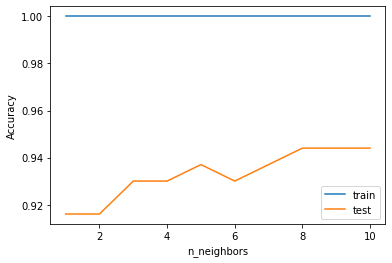

In [16]:
train_accuracy = []
test_accuracy  = []
n_neighbors = range(1, 11)

for k in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=k, weights="distance")
    clf.fit(X_train, Y_train)
    train_accuracy.append(clf.score(X_train, Y_train))
    test_accuracy.append(clf.score(X_test, Y_test))

plt.plot(n_neighbors, train_accuracy, label="train")
plt.plot(n_neighbors, test_accuracy, label="test")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()